<a href="https://colab.research.google.com/github/Cardcaptress/bioinformatics-data-analyse/blob/practicals/Kopie_van_LB2292_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 2: Group Testing and multiple testing correction

Notebook version: `25.1` (please don't change)

**IMPORTANT: Before you do anything, save a copy of this notebook to your own google drive using the `File -> Save a copy to Drive` button in the menu. Otherwise you cannot save your changes. Once you've saved a copy to your own drive, it's available there just like a regular Google Docs file, and it is saved automatically.**


Load in the required libraries and data by running the cell below.

In [1]:
!wget -nc https://raw.githubusercontent.com/brmprnk/LB2292/main/golub.pkl
!wget -nc https://raw.githubusercontent.com/brmprnk/LB2292/main/LST_Functions.py

import numpy as np
import pickle
import math
import statsmodels.stats.multitest as multitest
import scipy.special as special
import scipy.stats as stats
import matplotlib.pyplot as plt

from LST_Functions import ztest_1samp  # ignore the yellow warning line

# Read data
with open('golub.pkl', 'rb') as f:
	datadict = pickle.load(f)

data = datadict['data']
genes = datadict['genes']
labels = datadict['labels']

ALL = np.where(labels == 0)[0]
AML = np.where(labels == 1)[0]

--2025-02-20 09:57:55--  https://raw.githubusercontent.com/brmprnk/LB2292/main/golub.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7640109 (7.3M) [application/octet-stream]
Saving to: ‘golub.pkl’

golub.pkl           100%[===================>]   7.29M  --.-KB/s    in 0.1s    

2025-02-20 09:57:55 (53.1 MB/s) - ‘golub.pkl’ saved [7640109/7640109]

--2025-02-20 09:57:56--  https://raw.githubusercontent.com/brmprnk/LB2292/main/LST_Functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15367 (15K) [text/plain]
Saving to: ‘

### **Fisher's exact test**
There may be a genetic basis for increased tasting abilities. Last year, researchers performed
a genome- wide association study (GWAS) to find the relationship between genetic variations
(single nucleotides) and several taste traits. Thousands of **GWAS** studies have been performed
since their introduction one decade ago. You can read more about them for instance on
[Wikipedia](https://en.wikipedia.org/wiki/Genome-wide_association_study).

For one trait, enhanced bitter taste ability, the GWAS results from last year are as follows:

|   | **SNP_id: rs4988235**  |   |
|---|---|---|

|   | AA  | AG  | GG  |
|---|---|---|---|
| Bitter  | 2 | 3 | 7 |
| Not Bitter  | 4 | 9 | 11 |




---

####  ✏ Exercise 1a (Fisher's exact test)

> Determine the association between bitter taste and the AA/AG SNP using Fisher’s Exact Test. Is the association significant? Use the `math.comb` function for the nCr operator.
>
> Hint: Turn this 2x3 table into a 2x2 contingency table.


In [2]:
# Contigency table, AA & AG taken together
import math
alpha = 0.05
Table = np.array([[5, 7], [13, 11]])

nbitter    = Table[0][0] + Table[0][1]
nnonbitter = Table[1][0] + Table[1][1]
AGtotal = Table[0][0]+Table[1][0]
n = nbitter + nnonbitter

All = math.comb(n, AGtotal)
answer = 0;

for x in range(Table[0][0],nbitter+1):
  Bitter     = math.comb(nbitter, x)
  Notbitter  = math.comb(nnonbitter, AGtotal-x)
  Probability = Bitter*Notbitter/All
  answer += Probability

print('p-value is ',answer)

if answer < alpha:
  print("Significant")
else:
  print("Not significant")

p-value is  0.8555061179087877
Not significant



---

#### ✏ Exercise 1b (Fisher's exact test)

> Again calculate if the above association is significant, but this time use the function from `scipy.stats` (just `stats.function_to_call` will suffice). Was your above calculation of the p-value correct?


In [3]:
fish = stats.fisher_exact(Table,alternative='greater')
print('pvalue is ',fish[1])

if fish[1] == answer:
  print('values are the same')
elif np.isclose(fish[1],answer):
  print('values are close')
else:
  print('values are different')

pvalue is  0.8555061179087875
values are close


### Chi-square test


---

#### ✏ Exercise 2

> Repeat the previous exercise using the Pearson's Chi-square test. What is the p-value? Is the association significant?
>
> Hint: Use the Python function `st.chi2.sf` to calculate the p-value associated with X2. How many degrees of freedom would you use?

In [ ]:
# SOLUTION:

# Your code here ...


### **Fisher's exact / hypergeometric test**


---

#### ✏ Exercise 3a

> In an experiment to identify genes related to Alzheimer's, researchers have tested 500 genes in human samples. Among the 500 genes, 10 genes are known to be involved in calcium signaling and 200 are known to be involved in apoptosis. The researchers have *found* a significant association between 50 genes and Alzheimer's among which 6 belong to the calcium signaling set and 20 belong to the apoptosis set. The researcher wants to know whether genes involved in calcium signaling or apoptosis are more represented in their selected set.
>
> Hint: Look at the function `stats.fisher_exact`. This question requires two tests and thus two contingency tables.

In [ ]:
# Given variables
N = 500 # total number of genes
m = 50 # number of selected genes
S1 = 10 # number of genes involved in calcium signaling
k1 = 6 # number of genes in m and involved in calcium signaling
S2 = 200 # number of genes involved in apoptosis
k2 = 20 # number of genes in m and involved in apoptosis
p1 = 0 ## calcium signaling enrichment (to be calculated)
p2 =  0 ## apoptosis enrichment (to be calculated)

# SOLUTION:

# Your code here ...


### Gene Ontology enrichment


---

#### ✏ Exercise 3a (EXTRA QUESTION, not required)
> If you want to characterise a set of genes, you can look for enriched gene ontology (GO) terms: annotated properties of genes that are overrepresented in a gene set. There are many online tools to do this.
>
> Go to the ToppFun tool in [ToppGene](https://toppgene.cchmc.org/enrichment.jsp). Here you can enter a list of gene identifiers to find enriched GO terms. Enter a gene set, either from the t-test results of exercise A, or by selecting one of the example data sets. Click “start” to perform the tests. Which statistical test is used by ToppGene?

**SOLUTION:**

(your answer here)

---


### **Multiple testing correction**

The first code block has loaded in the golub data from Module 1. The following code will calculate the number of differentially expressed genes between the ALL and AML samples using a t-test and plot the distribution of the t-statistic and p-values. Next, we create a randomized dataset by permuting the sample labels, and we repeat the experiment.


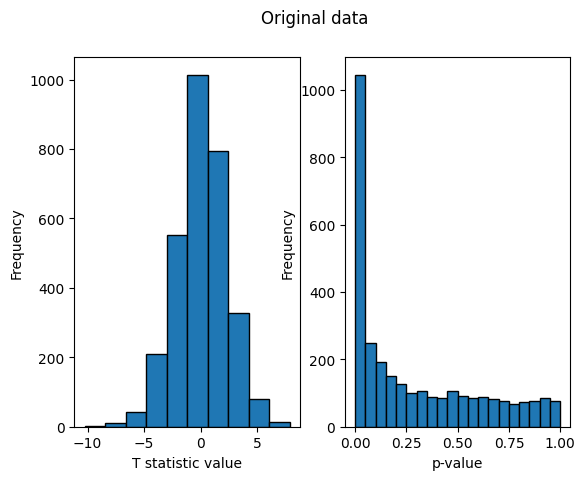

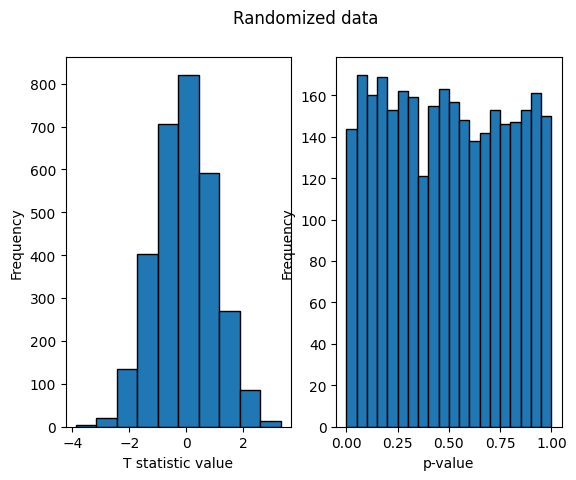

In [4]:
# (1) t-test on the real data
# perform t-test for all genes
[T, pTtest] = stats.ttest_ind(data[:, ALL], data[:, AML], axis=1, equal_var=True)

# plot the histogram of the t-statistics and p-values you calculated
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.hist(T, bins=10, edgecolor='k')
ax.set_xlabel('T statistic value')
ax.set_ylabel('Frequency')
ax = fig.add_subplot(1, 2, 2)
ax.hist(pTtest, bins=20, edgecolor='k')
ax.set_xlabel('p-value')
ax.set_ylabel('Frequency')
plt.suptitle('Original data')

# (2) t-test on the random data
# generate a new label vector (for now all labels are zero -> ALL)
l = np.random.permutation(labels)
# find the indices of the ALL and ALL samples
randALL = np.where(l == 0)[0];
randAML = np.where(l == 1)[0];
# apply the t-test to the random samples
[Trand, pRand] = stats.ttest_ind(data[:, randALL], data[:, randAML], axis=1, equal_var=True)

# plot the histogram of the t-statistics and p-values you calculated
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.hist(Trand, bins=10, edgecolor='k')
ax.set_xlabel('T statistic value')
ax.set_ylabel('Frequency')
ax = fig.add_subplot(1, 2, 2)
ax.hist(pRand, bins=20, edgecolor='k')
ax.set_xlabel('p-value')
ax.set_ylabel('Frequency')
plt.suptitle('Randomized data')
plt.show()


---
*** ✏ Exercise 4a

> What are the numbers of differentially expressed genes in case of using the real data and in case of using the randomized data? How can you explain the differentially expressed genes obtained using the randomized data?

In [10]:
# SOLUTION:
alpha = 0.05

sig_real = []
sig_rand = []

for i in range(0,len(pTtest)):
  if pTtest[i] < alpha:
    sig_real.append(i)

for i in range(0,len(pRand)):
  if pRand[i] < alpha:
    sig_rand.append(i)

print('# differently expressed genes in real data is ',len(sig_real))
print('# differently expressed genes in random data is ',len(sig_rand))
print('This difference can be observed in the plotted graphs above. The frequency of original data decreases with higher p-values.\nYet the randomized data frequencies are equally distributed over the p-values')
print('This explains why there are less significant genes in the randomized data with alpha <0.05')

# differently expressed genes in real data is  1045
# differently expressed genes in random data is  143
This difference can be observed in the plotted graphs above. The frequency of original data decreases with higher p-values.
Yet the randomized data frequencies are equally distributed over the p-values
This explains why there are less significant genes in the randomized data with alpha <0.05



---

#### ✏ Exercise 4b

> Use a Bonferroni (FWER) corrected significance level to call differentially expressed genes (using the real data). What is the new Bonferroni-corrected significance level (alpha)? How many genes are significant before and after correction? And in the randomized dataset?

In [22]:
# SOLUTION:
m = 3051
bon_alpha = alpha/m

bon_sig_real = []
bon_sig_rand = []

for i in range(0,len(pTtest)):
  if pTtest[i] < bon_alpha:
    bon_sig_real.append(i)

for i in range(0,len(pRand)):
  if pRand[i] < bon_alpha:
    bon_sig_rand.append(i)

print('# bonferroni significant genes in real data is ',len(bon_sig_real))
print('# bonferonni significant genes in random data is ',len(bon_sig_rand))
print()
print('# original significant genes in real data is ',len(sig_real))
print('# original significant genes in random data is ',len(sig_rand))


# bonferroni significant genes in real data is  98
# bonferonni significant genes in random data is  0

# original significant genes in real data is  1045
# original significant genes in random data is  143



---

#### ✏ Exercise 4c

> Use the Benjamini-Hochberg method (FDR) to correct for multiple testing. How many genes are differentially expressed (take FDR = 0.05)? How does this number compare to the number you got using the Bonferroni method? And in the randomized dataset?

In [17]:
# SOLUTION:
#sort pvalues real data
sorted_real = np.sort(pTtest)
sig_sorted_real = []

for i in range(len(sorted_real)):
  if sorted_real[i] <= (i+1)/m*alpha:
    sig_sorted_real.append(i)
  else:
    break

sorted_rand = np.sort(pRand)
sig_sorted_rand = []

for i in range(len(sorted_rand)):
  if sorted_rand[i] <= (i+1)/m*alpha:
    sig_sorted_rand.append(i)
  else:
    break

print('# FDR significant genes in real data is ',len(sig_sorted_real))
print('# FDR significant genes in random data is ',len(sig_sorted_rand))


# FDR significant genes in real data is  681
# FDR significant genes in random data is  0



---

#### ✏ Exercise 4d

> Use the `multitest.multipletests` function to correct for multiple testing using the Benjamini-Hochberg method. Do you get the same results?

In [20]:
# SOLUTION:

multi_real = multitest.multipletests(pTtest, alpha=alpha, method='fdr_bh')
multi_rand = multitest.multipletests(pRand, alpha=alpha, method = 'fdr_bh')
n_real = 0
n_rand = 0

for i in multi_real[0]:
  if i:
   n_real+=1

for i in multi_rand[0]:
  if i:
   n_rand+=1

x = sum(multi_real[0])
y = sum(multi_rand[0])

print('# multipletest FDR significant genes in real data is ',x)
print('# multipletest FDR significant genes in random data is ',y)
print('Both tests show the same results')

# multipletest FDR significant genes in real data is  681
# multipletest FDR significant genes in random data is  0
Both tests show the same results
